In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
target_size = (224, 224)
train_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/transfer_learning/classify_binary_images/images/train',
    target_size=target_size,
    batch_size=12,
    shuffle=False ,
    class_mode='categorical'
)
validation_generator = data_generator.flow_from_directory(
    directory='/content/drive/My Drive/transfer_learning/classify_binary_images/images/val',
    target_size=target_size,
    batch_size=4,
    shuffle=False ,
    class_mode='categorical'
)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
from keras.applications import Xception
resnet_weights_path = '/content/drive/My Drive/transfer_learning/classify_binary_images/models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model=Xception(include_top=False, pooling='avg', weights=resnet_weights_path)

In [6]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, None, None, 32) │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, None, None, 32) │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, None, None, 64) │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, None, None, 64) │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, None, None, 64) │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, None, None,     │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, None, None,     │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, None, None,     │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, None, None,     │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, None, None,     │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None,     │          8,192 │ block1_conv2_act[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, None, None,     │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │ 128)                   │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [8]:
len(base_model.layers)

133

In [9]:
base_model.trainable=False

In [10]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,865,578 (79.60 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
epochs=20
history = model.fit(
    x=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.4482 - loss: 0.7347 - val_accuracy: 0.5000 - val_loss: 0.6493
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.2756 - loss: 0.7486 - val_accuracy: 1.0000 - val_loss: 0.5260
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9897 - loss: 0.4783 - val_accuracy: 1.0000 - val_loss: 0.4460
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9496 - loss: 0.4291 - val_accuracy: 1.0000 - val_loss: 0.3814
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.3573 - val_accuracy: 1.0000 - val_loss: 0.3298
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.2995 - val_accuracy: 1.0000 - val_loss: 0.2878
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 0.2711 - val_accuracy: 1.0000 - val_loss: 0.2555
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.2300 - val_accuracy: 1.0000 - val_loss: 0.2312

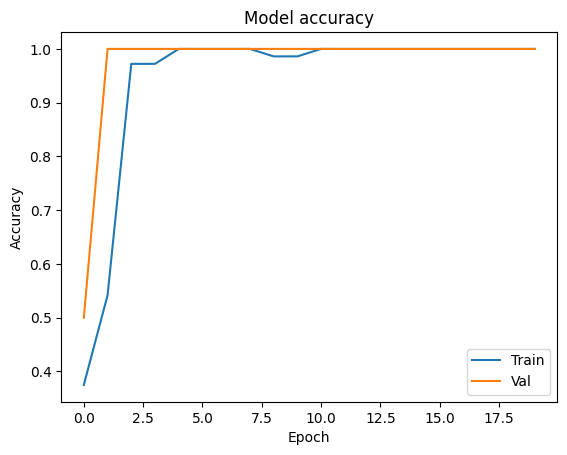

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
validation_generator.reset()
score = model.evaluate(validation_generator, steps=len(validation_generator))
print('Test accuracy:', round(score[1]*100, 2))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.1028
Test accuracy: 100.0


In [15]:
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


array([[9.9257141e-01, 7.4286368e-03],
       [9.8893017e-01, 1.1069858e-02],
       [9.4652981e-01, 5.3470172e-02],
       [9.9799073e-01, 2.0092211e-03],
       [9.9126476e-01, 8.7352423e-03],
       [9.9862158e-01, 1.3783658e-03],
       [9.7271198e-01, 2.7287941e-02],
       [9.9601316e-01, 3.9868876e-03],
       [8.9440686e-01, 1.0559312e-01],
       [9.9468780e-01, 5.3122356e-03],
       [1.5447873e-03, 9.9845517e-01],
       [5.8000372e-03, 9.9419999e-01],
       [4.0526781e-03, 9.9594730e-01],
       [1.4550588e-02, 9.8544943e-01],
       [2.0115474e-02, 9.7988451e-01],
       [1.0183511e-02, 9.8981655e-01],
       [2.2326395e-02, 9.7767365e-01],
       [6.5370905e-03, 9.9346292e-01],
       [6.5705855e-04, 9.9934298e-01],
       [9.0594275e-04, 9.9909413e-01]], dtype=float32)

In [16]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
validation_generator.class_indices

{'rural': 0, 'urban': 1}

In [18]:
class_labels = [class_name for class_name in validation_generator.class_indices.keys()]
class_labels

['rural', 'urban']

In [19]:
y_true = validation_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[10,  0],
       [ 0, 10]])

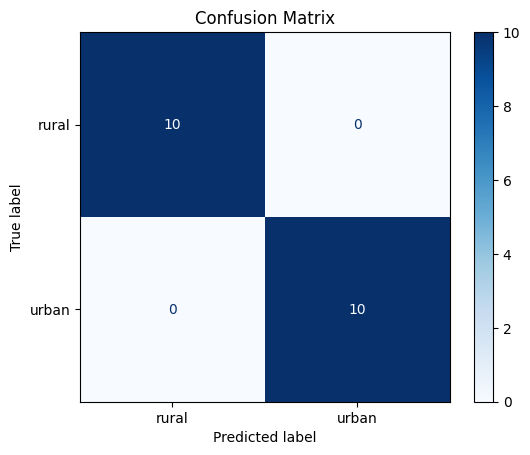

In [21]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [22]:
model.save("/content/drive/My Drive/transfer_learning/classify_binary_images//classify_urban_rural_model.keras")

In [23]:
from keras.models import load_model
loaded_model = load_model("/content/drive/My Drive/transfer_learning/classify_binary_images//classify_urban_rural_model.keras")

In [24]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,873,776 (79.63 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 8,198 (32.03 KB)

In [25]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

img_path = '/content/drive/My Drive/transfer_learning/classify_binary_images/images/val/rural/rural10.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_arr_proc = preprocess_input(img_array)


In [26]:
prediction = loaded_model.predict(img_arr_proc)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[0.98893017, 0.01106986]], dtype=float32)

In [27]:
class_index = np.argmax(prediction, axis=1)
class_index

array([0])

In [28]:
class_labels = ['rural', 'urban']
predicted_class_label = class_labels[class_index[0]]
predicted_class_label

'rural'

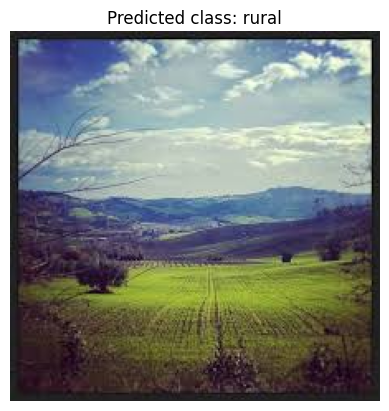

In [29]:
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()

In [36]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_arr_proc = preprocess_input(img_array)
    return img, img_arr_proc


Some Urban Images: 


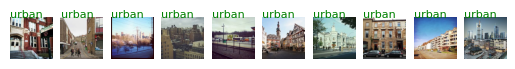

In [37]:
import os
class_labels = ['rural', 'urban']

folder_path_urban = "/content/drive/My Drive/transfer_learning/classify_binary_images/images/train/urban"

jpeg_files_urban = [f for f in os.listdir(folder_path_urban) if f.endswith(".jpeg") or f.endswith(".jpg")]

num_photos_to_display = 10
true_class="urban"
print("Some Urban Images: ")
for i, jpeg_file in enumerate(jpeg_files_urban[:num_photos_to_display]):
    img_path = os.path.join(folder_path_urban, jpeg_file)
    img, img_array = load_and_preprocess_image(img_path)
    prediction = loaded_model.predict(img_array ,verbose=0)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(img)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)
    plt.axis("off")

plt.show()


Some Rural Images: 


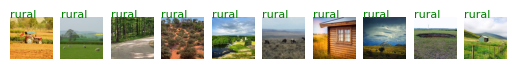

In [38]:
folder_path_rural = "/content/drive/My Drive/transfer_learning/classify_binary_images/images/train/rural"

jpeg_files_rural = [f for f in os.listdir(folder_path_rural) if f.endswith(".jpeg") or f.endswith(".jpg")]

true_class="rural"
print("Some Rural Images: ")
for i, jpeg_file in enumerate(jpeg_files_rural[:num_photos_to_display]):
    img_path = os.path.join(folder_path_rural, jpeg_file)
    img, img_array = load_and_preprocess_image(img_path)
    prediction = loaded_model.predict(img_array,verbose=0)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(img)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)
    plt.axis("off")